# Spherical Scattering Example 

In [14]:
import sys
import os

import phys
import phys.newton
import phys.light
import numpy as np
import time
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

sim = phys.Simulation(params={"bounds": np.array([1000, 1000, 1000]), "cl_on": True, "exit": lambda cond: cond.t >= 0.100})

sim.add_objs(phys.light.generate_photons(1000, bins=100, dist="gauss", min=phys.light.E_from_wavelength(200e-9), max=phys.light.E_from_wavelength(700e-9)))

sim.add_step(0, phys.UpdateTimeStep(lambda s: np.double(0.001)))
sim.add_step(1, phys.newton.NewtonianKinematicsStep())
sim.add_step(2, phys.light.ScatterSphericalStep(np.double(0.001), np.double(0.001)))
m2 = phys.light.ScatterSignMeasureStep(None, True)
sim.add_step(4, m2)

sim.start()

while sim.running:
        time.sleep(0.1)
        print(sim.get_state())

{'objects': 15938, 't': 0.001, 'dt': 0.001, 'run_time': 0.11290955543518066}
{'objects': 15938, 't': 0.002, 'dt': 0.001, 'run_time': 0.25179123878479004}
{'objects': 15938, 't': 0.003, 'dt': 0.001, 'run_time': 0.38169050216674805}
{'objects': 15938, 't': 0.004, 'dt': 0.001, 'run_time': 0.48860764503479004}
{'objects': 15938, 't': 0.004, 'dt': 0.001, 'run_time': 0.6010968685150146}
{'objects': 15938, 't': 0.005, 'dt': 0.001, 'run_time': 0.7489831447601318}
{'objects': 15938, 't': 0.006, 'dt': 0.001, 'run_time': 0.856898307800293}
{'objects': 15938, 't': 0.007, 'dt': 0.001, 'run_time': 0.9638149738311768}
{'objects': 15938, 't': 0.008, 'dt': 0.001, 'run_time': 1.0937137603759766}
{'objects': 15938, 't': 0.008, 'dt': 0.001, 'run_time': 1.2066261768341064}
{'objects': 15938, 't': 0.009000000000000001, 'dt': 0.001, 'run_time': 1.3365252017974854}
{'objects': 15938, 't': 0.010000000000000002, 'dt': 0.001, 'run_time': 1.4434421062469482}
{'objects': 15938, 't': 0.011000000000000003, 'dt': 0.0

{'objects': 15938, 't': 0.07300000000000005, 'dt': 0.001, 'run_time': 11.322168350219727}
{'objects': 15938, 't': 0.07300000000000005, 'dt': 0.001, 'run_time': 11.43509316444397}
{'objects': 15938, 't': 0.07400000000000005, 'dt': 0.001, 'run_time': 11.544995069503784}
{'objects': 15938, 't': 0.07500000000000005, 'dt': 0.001, 'run_time': 11.651418685913086}
{'objects': 15938, 't': 0.07500000000000005, 'dt': 0.001, 'run_time': 11.764330625534058}
{'objects': 15938, 't': 0.07600000000000005, 'dt': 0.001, 'run_time': 11.876243829727173}
{'objects': 15938, 't': 0.07700000000000005, 'dt': 0.001, 'run_time': 12.002158880233765}
{'objects': 15938, 't': 0.07700000000000005, 'dt': 0.001, 'run_time': 12.112072944641113}
{'objects': 15938, 't': 0.07800000000000006, 'dt': 0.001, 'run_time': 12.237962484359741}
{'objects': 15938, 't': 0.07900000000000006, 'dt': 0.001, 'run_time': 12.379852294921875}
{'objects': 15938, 't': 0.08000000000000006, 'dt': 0.001, 'run_time': 12.487768173217773}
{'objects':

This simulation works similarly to the deletion simulation. For this, we change the exit condition to `lambda cond: cond.t >= 0.100` so it ends after $0.100$ seconds have been simulated. Then we add `ScatterSphericalStep`, which scatters with the same probability as with `ScatterDeleteStep`, but will instead scatter photons in a random direction.

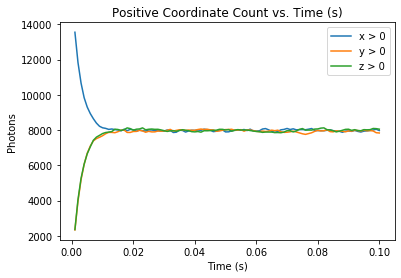

In [15]:
plt.plot(sim.ts, [x[2] for x in m2.data], label="x > 0")
plt.plot(sim.ts, [x[3] for x in m2.data], label="y > 0")
plt.plot(sim.ts, [x[4] for x in m2.data], label="z > 0")
plt.ylabel("Photons")
plt.xlabel("Time (s)")
plt.legend()
plt.title("Positive Coordinate Count vs. Time (s)")

plt.show()

One property of scattering in a random direction will be that the positive and negative signed coordinates will be evenly split for each axis. Since we initialized every ray in the $+x$ direction, we will see it decrease to around $50\%$ of the original photons, while photons with a $+y$ and $+z$ direction will increase to around $50\%$.